# K-means clustering

In [41]:
import sys
sys.path.append("..")

# inline for docked plots, none for undocked plots (best for the report)
# %matplotlib
%matplotlib inline  

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time
from knn import knn_algorithm
from utils import vis_utils
from utils import data_utils

In [3]:
data = pd.read_csv("../data.csv", header=None)
data = pd.DataFrame.to_numpy(data)
data = np.delete(data, 0, 1)
np.random.shuffle(data)

### 3.1.1 
Try to improve the performance on 2-person (disjunct) dataset (you can select any 2 person data for this) using K-means clustering. Perform K- means clustering of each cipher individually for the training set, in order to represent the training data as a number of cluster centroids. Now perform the training of the k-NN using the centroids of these clusters. You can try with different cluster sizes and see the resulting performance.




In [47]:
student1 = 5
student2 = 16

# Training data from one student
d_train = data[data[:,0] == student1]
l_train = d_train[:,1]
d_train = np.delete(d_train, [0,1], 1)

# Test data from another student
d_test = data[data[:,0] == student2]
l_test = d_test[:,1]
d_test = np.delete(d_test, [0,1], 1)

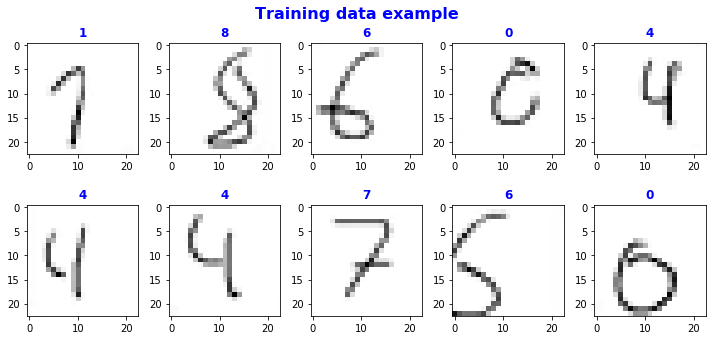

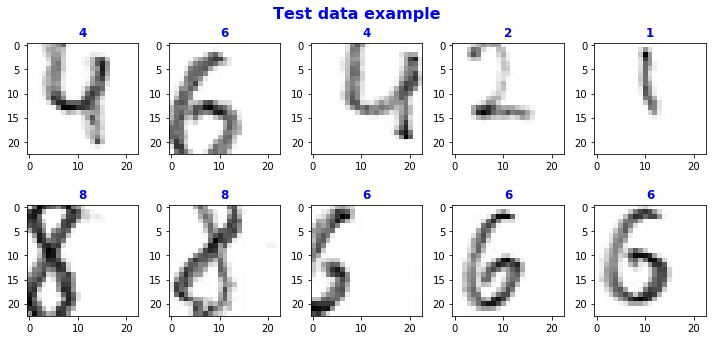

In [48]:
vis_utils.visualize_generic(d_train[50:60], 2, 5, "Training data example", l_train[50:60])
vis_utils.visualize_generic(d_test[50:60], 2, 5, "Test data example", l_test[50:60])

In [6]:
# Initializing KMeans without smart improvements, just as in the slides
k_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 35, 50]
# k_clusters = [2, 3]
k_nn = [1]

acc = []
t_knn = []
t_kmeans = []

for k in k_clusters:
    print('k =', k, end='\t')
    # kmeans = KMeans(n_clusters=k, init='random', n_init=100, algorithm='full')
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, algorithm='full')

    centroids = np.ndarray((0,d_train.shape[1]))
    c_labels = np.ndarray((0,1))
    t_start = time.time()
    for cipher in range(10):

        kmeans.fit(d_train[l_train == cipher])

        centroids = np.append(centroids, kmeans.cluster_centers_, axis=0)
        l = [cipher]*k
        c_labels = np.append(c_labels, l)

    t_elapsed = time.time() - t_start
    t_kmeans.append(t_elapsed)
    print("t_kmeans =", "{:.3f}".format(t_elapsed), end='\t')

    a,_,_,_,t = knn_algorithm.knnParamSearch(centroids, c_labels, d_test, l_test, k_nn, ['euclidean'])
    print('acc =', "{:.3f}".format(a[0]), '\tt_knn =', "{:.3f}".format(t[0]))
    acc.append(a[0])
    t_knn.append(t[0])


a_bl,_,_,_,t_bl = knn_algorithm.knnParamSearch(d_train, l_train, d_test, l_test, k_nn, ['euclidean'])
print("No clustering:\t\t\t\tacc =", "{:.3f}".format(a_bl[0]), "\tt_knn =", "{:.3f}".format(t_bl[0]))

a_bl = a_bl*len(k_clusters)
t_bl = t_bl*len(k_clusters)

k = 2	t_kmeans = 2.765	acc = 0.327 	t_knn = 0.180
k = 3	t_kmeans = 2.445	acc = 0.362 	t_knn = 0.149
k = 4	t_kmeans = 1.170	acc = 0.381 	t_knn = 0.148
k = 5	t_kmeans = 0.928	acc = 0.382 	t_knn = 0.134
k = 6	t_kmeans = 1.144	acc = 0.395 	t_knn = 0.164
k = 7	t_kmeans = 1.532	acc = 0.408 	t_knn = 0.178
k = 8	t_kmeans = 0.856	acc = 0.416 	t_knn = 0.137
k = 9	t_kmeans = 0.907	acc = 0.402 	t_knn = 0.145
k = 10	t_kmeans = 1.323	acc = 0.412 	t_knn = 0.227
k = 12	t_kmeans = 0.828	acc = 0.414 	t_knn = 0.143
k = 15	t_kmeans = 1.383	acc = 0.427 	t_knn = 0.146
k = 20	t_kmeans = 0.646	acc = 0.445 	t_knn = 0.137
k = 25	t_kmeans = 0.711	acc = 0.438 	t_knn = 0.141
k = 35	t_kmeans = 1.028	acc = 0.429 	t_knn = 0.195
k = 50	t_kmeans = 1.035	acc = 0.413 	t_knn = 0.222
No clustering:				acc = 0.322 	t_knn = 0.517


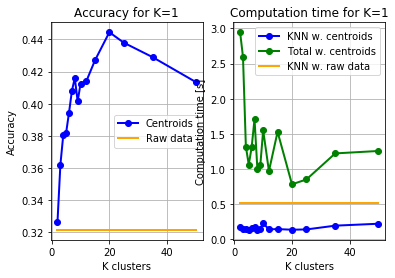

In [7]:
fig, axs = plt.subplots(1, 2)

t_total = np.add(t_knn, t_kmeans)

axs[0].plot(k_clusters, acc, linewidth=2.0, marker=".", markersize=12, color='blue', label="Centroids")
axs[0].plot(k_clusters, a_bl, linewidth=2.0, marker=".", markersize=0, color='orange', label="Raw data")
axs[0].set(title="Accuracy for K=1", xlabel="K clusters", ylabel="Accuracy")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(k_clusters, t_knn, linewidth=2.0, marker=".", markersize=12, color='blue', label="KNN w. centroids")
axs[1].plot(k_clusters, t_total, linewidth=2.0, marker=".", markersize=12, color='green', label="Total w. centroids")
axs[1].plot(k_clusters, t_bl, linewidth=2.0, marker=".", markersize=0, color='orange', label="KNN w. raw data")
axs[1].set(title="Computation time for K=1", xlabel="K clusters", ylabel="Computation time [s]")
axs[1].legend()
axs[1].grid(True)

plt.show()

### 3.1.2 
Compare your KNN performance based on the raw training data and based on the cluster centroids of the training data. During the comparison you should also consider the run times of the algorithm. As the generation of clusters is based on random starting points cross-validation should be performed.

- Plotting a confusion matrix is recomended


In [8]:
data2 = data[data[:,0] == student1]
data2 = np.append(data2, data[data[:,0] == student2], axis=0)

cross_val_cnt = 10

k_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 35, 50]
k_nn = [1]

acc_kmeans = []
t_kmeans = []
t_knn = []
t_total = []
conf_mat_kmeans = []

print("Running cross validation with clustering:")
for j, k in enumerate(k_clusters):
    print('k =', k, end='\t')
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, algorithm='full')

    t_kmeans_tmp = []
    acc_kmeans_tmp = []
    t_knn_tmp = []
    conf_mat_kmeans.append(np.zeros((10,10)))

    for val_i in range(cross_val_cnt):
        d_train, l_train, d_test, l_test = data_utils.split_data_crossValidation(data2, val_i, cross_val_cnt)
        
        centroids = np.ndarray((0,d_train.shape[1]))
        c_labels = np.ndarray((0,1))
        t_start = time.time()

        for cipher in range(10):

            kmeans.fit(d_train[l_train == cipher])

            centroids = np.append(centroids, kmeans.cluster_centers_, axis=0)
            l = [cipher]*k
            c_labels = np.append(c_labels, l)

        t_elapsed = time.time() - t_start
        t_kmeans_tmp.append(t_elapsed)
                
        a, _, _, conf_mat, t = knn_algorithm.knnParamSearch(centroids, c_labels, d_test, l_test, k_nn, ['euclidean'])
        acc_kmeans_tmp.append(a[0])
        t_knn_tmp.append(t[0])
        conf_mat_kmeans[j] = np.add(conf_mat_kmeans[j], conf_mat[0])
    
    acc_kmeans.append(np.average(acc_kmeans_tmp))
    t_kmeans.append(np.average(t_kmeans_tmp))
    t_knn.append(np.average(t_knn_tmp))

    print("t_kmeans avg =", "{:.3f}".format(t_kmeans[j]), end='\t')
    print('acc avg =', "{:.3f}".format(acc_kmeans[j]), '\tt_knn avg =', "{:.3f}".format(t_knn[j]))

t_total = np.add(t_knn, t_kmeans)


acc_raw = []
t_raw = []
conf_mat_raw = np.zeros((10,10))

print("Running cross validation with raw data:")
for i in range(cross_val_cnt):
    print("i =", i, end='\t')
    d_train, l_train, d_test, l_test = data_utils.split_data_crossValidation(data2, i, cross_val_cnt)
    
    a, _, _, conf_mat, t = knn_algorithm.knnParamSearch(d_train, l_train, d_test, l_test, k_nn, ['euclidean'])
    acc_raw.append(a[0])
    t_raw.append(t[0])
    conf_mat_raw = np.add(conf_mat_raw, conf_mat[0])

    print('acc =', "{:.3f}".format(a[0]), '\tt_knn =', "{:.3f}".format(t[0]))

acc_raw_avg = [np.average(acc_raw)] * len(k_clusters)
t_raw_avg = [np.average(t_raw)] * len(k_clusters)

Running cross validation with clustering:
k = 2	t_kmeans avg = 1.567	acc avg = 0.670 	t_knn avg = 0.041
k = 3	t_kmeans avg = 1.475	acc avg = 0.701 	t_knn avg = 0.027
k = 4	t_kmeans avg = 1.438	acc avg = 0.731 	t_knn avg = 0.034
k = 5	t_kmeans avg = 1.201	acc avg = 0.756 	t_knn avg = 0.028
k = 6	t_kmeans avg = 1.354	acc avg = 0.773 	t_knn avg = 0.032
k = 7	t_kmeans avg = 1.636	acc avg = 0.788 	t_knn avg = 0.029
k = 8	t_kmeans avg = 1.378	acc avg = 0.788 	t_knn avg = 0.036
k = 9	t_kmeans avg = 1.673	acc avg = 0.796 	t_knn avg = 0.039
k = 10	t_kmeans avg = 1.347	acc avg = 0.802 	t_knn avg = 0.030
k = 12	t_kmeans avg = 1.619	acc avg = 0.815 	t_knn avg = 0.034
k = 15	t_kmeans avg = 1.792	acc avg = 0.824 	t_knn avg = 0.038
k = 20	t_kmeans avg = 1.472	acc avg = 0.831 	t_knn avg = 0.031
k = 25	t_kmeans avg = 1.373	acc avg = 0.837 	t_knn avg = 0.028
k = 35	t_kmeans avg = 1.883	acc avg = 0.839 	t_knn avg = 0.037
k = 50	t_kmeans avg = 1.894	acc avg = 0.849 	t_knn avg = 0.040
Running cross validat

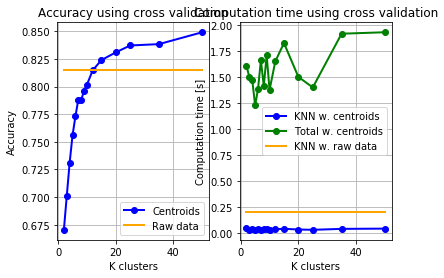

In [9]:
# Ploting graph of accuracy
fig, axs = plt.subplots(1, 2)

t_total = np.add(t_knn, t_kmeans)

axs[0].plot(k_clusters, acc_kmeans, linewidth=2.0, marker=".", markersize=12, color='blue', label="Centroids")
axs[0].plot(k_clusters, acc_raw_avg, linewidth=2.0, marker=".", markersize=0, color='orange', label="Raw data")
axs[0].set(title="Accuracy using cross validation", xlabel="K clusters", ylabel="Accuracy")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(k_clusters, t_knn, linewidth=2.0, marker=".", markersize=12, color='blue', label="KNN w. centroids")
axs[1].plot(k_clusters, t_total, linewidth=2.0, marker=".", markersize=12, color='green', label="Total w. centroids")
axs[1].plot(k_clusters, t_raw_avg, linewidth=2.0, marker=".", markersize=0, color='orange', label="KNN w. raw data")
axs[1].set(title="Computation time using cross validation", xlabel="K clusters", ylabel="Computation time [s]")
axs[1].legend()
axs[1].grid(True)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

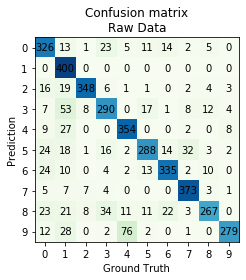

In [49]:



hm_labels = ['0','1','2','3','4','5','6','7','8','9']
fig, ax = plt.subplots()
im = ax.imshow(conf_mat_raw, cmap='GnBu')

ax.set_xticks(np.arange(len(hm_labels)), hm_labels)
ax.set_yticks(np.arange(len(hm_labels)), hm_labels)
plt.locator_params(nbins=10)

for i in range(10):
    for j in range(10):
        text = ax.text(j, i, "{:.0f}".format(conf_mat_raw[i,j]), ha='center', va='center', color='black')

ax.set_title("Confusion matrix\nRaw Data")
ax.set_xlabel("Ground Truth")
ax.set_ylabel("Prediction")
fig.tight_layout()
plt.show

In [51]:
print(np.max(data[:,0]))

A = np.random.rand(5,2)

print(A)

rows = [1, 3]
print(A[rows])

33
[[0.02359071 0.87644604]
 [0.35405286 0.39778969]
 [0.76548308 0.18936691]
 [0.98649751 0.91218603]
 [0.7106974  0.99814162]]
[[0.35405286 0.39778969]
 [0.98649751 0.91218603]]


### 3.1.3 
Perform K-means clustering on each cipher individually for the training data from all the available datasets (disjunct). Represent the training data as a number of cluster centroids and compare performance, try multiple cluster sizes.